In [1]:
!unzip -q new_dataset.zip

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#NORMALIZATION
image_size = (224, 224)
batch_size = 32
data_dir = '/content/new_dataset'


datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 173 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


In [39]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Load MobileNetV2 base model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

# Freeze most layers (optional, good for fine-tuning)
for layer in base_model.layers[:-80]:
    layer.trainable = False

# Add your classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)

# ✅ Correct number of output classes — YOU HAVE 3
outputs = Dense(3, activation='softmax', kernel_regularizer=l2(0.001))(x)

# Create and compile the model
model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [40]:


print("Train classes:", train_generator.num_classes)
print("Validation classes:", val_generator.num_classes)
print(train_generator.class_indices)



Train classes: 3
Validation classes: 3
{'ripe': 0, 'turning': 1, 'unripe': 2}


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3895 - loss: 1.5386 - val_accuracy: 0.3415 - val_loss: 1.5732
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.3791 - loss: 1.5873 - val_accuracy: 0.3415 - val_loss: 1.5688
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.4402 - loss: 1.3753 - val_accuracy: 0.3171 - val_loss: 1.4262
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 677ms/step - accuracy: 0.4464 - loss: 1.3069 - val_accuracy: 0.3659 - val_loss: 1.4403
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.5660 - loss: 1.2377 - val_accuracy: 0.4390 - val_loss: 1.3735
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.5822 - loss: 1.1017 - val_accuracy: 0.4146 - val_loss: 1.3646
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.6935 - loss: 1.0704 - val_accuracy: 0.4634 - val_loss: 1.2957
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 629ms/step - accuracy: 0.6525 - loss: 1.0363 - val_accuracy: 0.4390 - val_loss: 1

In [21]:
model.save('/content/mobilenetv2_fruit_classifier.h5')


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/test12.jpeg'#path of test image
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  #NORMALIZATION

In [19]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'turning', 'unripe']
print("Predicted class:", class_names[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class index: 2
Predicted class: unripe


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class index: 2
Predicted class: unripe


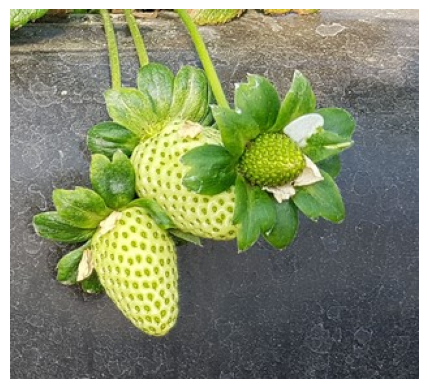

In [55]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'turning', 'unripe']
print("Predicted class:", class_names[predicted_class_index])
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

In [23]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 705ms/step - accuracy: 0.9057 - loss: 0.5498 - val_accuracy: 0.8293 - val_loss: 0.8841
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.9060 - loss: 0.6075 - val_accuracy: 0.7073 - val_loss: 0.8739
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.9295 - loss: 0.5630 - val_accuracy: 0.8049 - val_loss: 0.8847
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.9125 - loss: 0.5283 - val_accuracy: 0.7805 - val_loss: 0.8315
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 641ms/step - accuracy: 0.9126 - loss: 0.5409 - val_accuracy: 0.8293 - val_loss: 0.7908
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.9301 - loss: 0.5163 - val_accuracy: 0.8293 - val_loss: 0.8712
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.9488 - loss: 0.4850 - val_accuracy: 0.7805 - val_loss: 0.8536
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.9250 - loss: 0.4991 - val_accuracy: 0.7561 - val_loss:

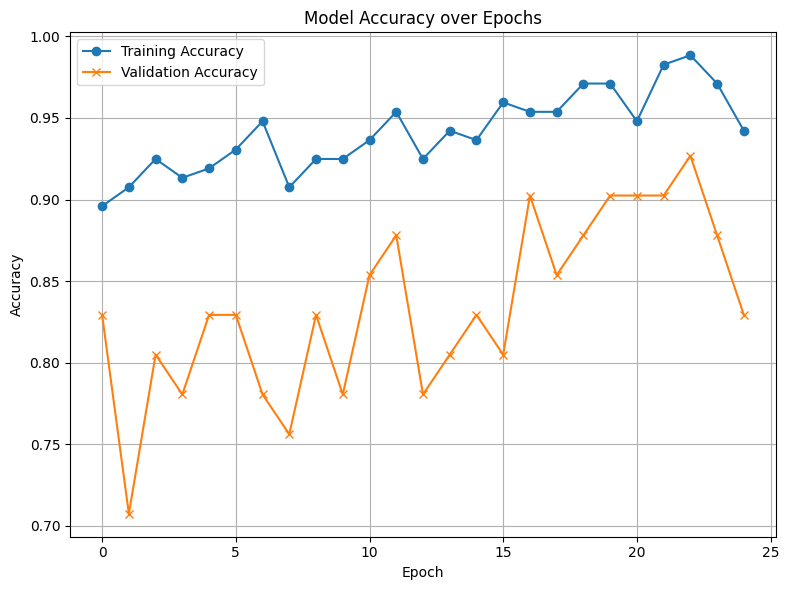

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


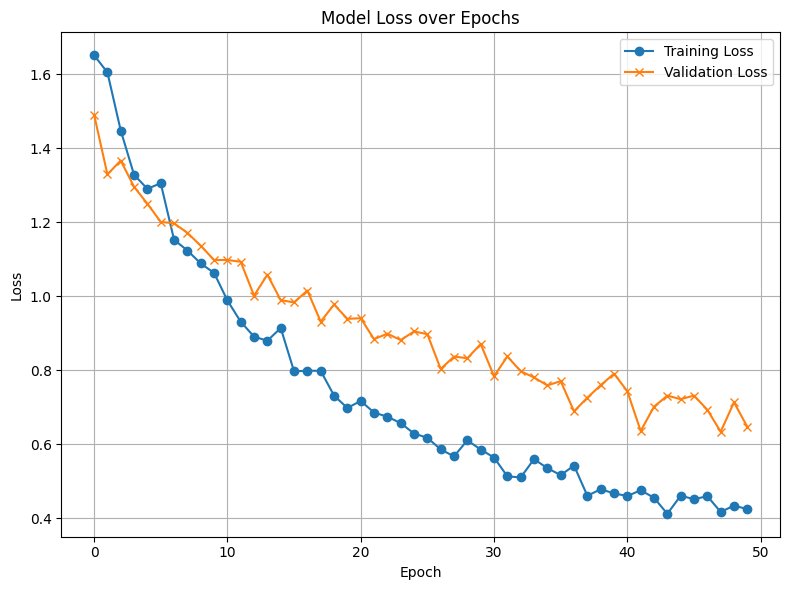

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

image_size = (224, 224)
batch_size = 32

# Optional: Custom preprocessing to adjust contrast
def contrast_enhancer(img):
    return tf.image.random_contrast(img, lower=0.7, upper=1.3)

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,               # Increased rotation
    zoom_range=[0.8, 1.2],           # Smart zoom range
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    channel_shift_range=30.0,        # Adds color shift
    preprocessing_function=contrast_enhancer,  # Contrast enhancer
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/new_dataset',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/new_dataset',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 173 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


In [52]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 841ms/step - accuracy: 0.9701 - loss: 0.4035 - val_accuracy: 0.8293 - val_loss: 0.6288
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 622ms/step - accuracy: 0.9684 - loss: 0.4057 - val_accuracy: 0.7805 - val_loss: 0.6981
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 907ms/step - accuracy: 0.9220 - loss: 0.4870 - val_accuracy: 0.8537 - val_loss: 0.6825
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 626ms/step - accuracy: 0.9614 - loss: 0.4285 - val_accuracy: 0.8780 - val_loss: 0.6658
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.9748 - loss: 0.3795 - val_accuracy: 0.8049 - val_loss: 0.6432
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 906ms/step - accuracy: 0.9612 - loss: 0.4239 - val_accuracy: 0.7561 - val_loss: 0.6766
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.9856 - loss: 0.3808 - val_accuracy: 0.8293 - val_loss: 0.6285
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - accuracy: 0.9729 - loss: 0.4119 - val_accuracy: 0.8293 - v

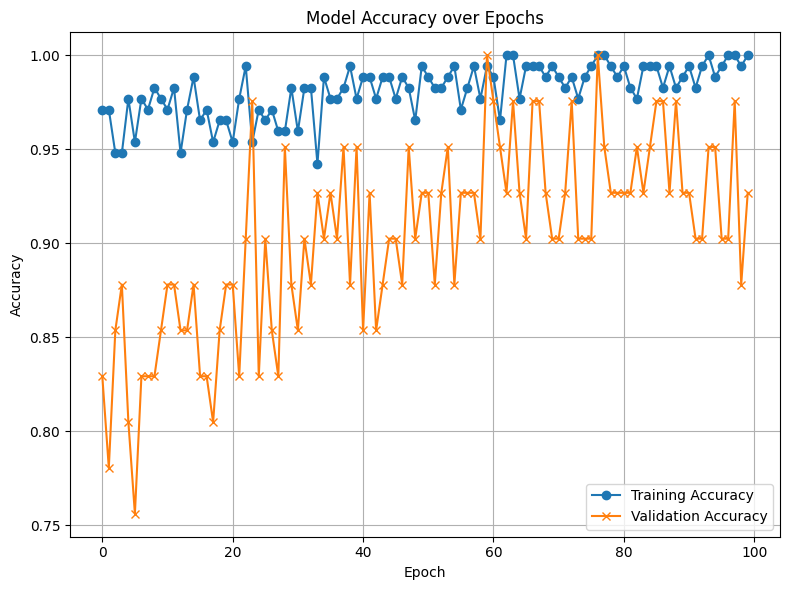

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


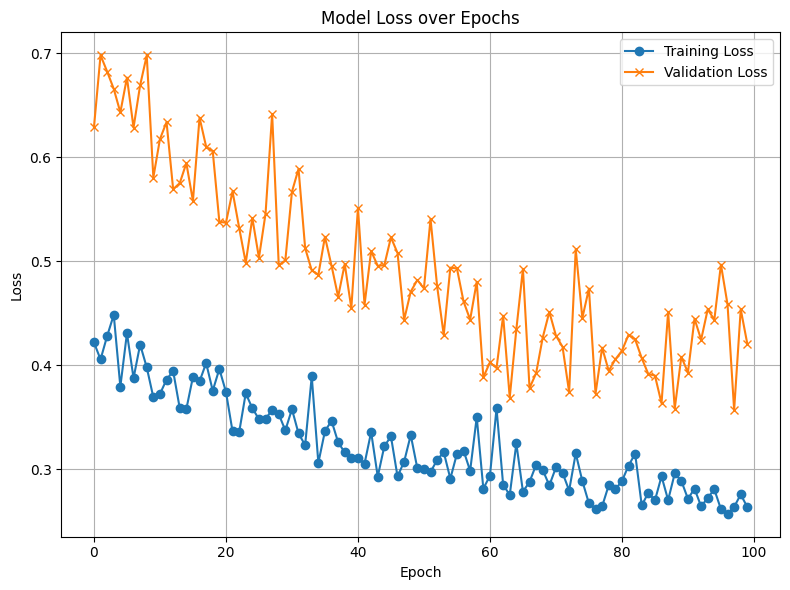

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/test12.jpeg'#path of test image
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  #NORMALIZATION

In [58]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'turning', 'unripe']
print("Predicted class:", class_names[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class index: 2
Predicted class: unripe


In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)
class_names = ['ripe', 'turning', 'unripe']
print("Predicted class:", class_names[predicted_class_index])
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

NameError: name 'model' is not defined